<a href="https://colab.research.google.com/github/syedhussain07/Python-Code-for-Project/blob/main/Weighted_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-a5e784b38d53>:17: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if startup_data[column].dtype == np.number:
<ipython-input-2-a5e784b38d53>:17: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if startup_data[column].dtype == np.number:
<ipython-input-2-a5e784b38d53>:17: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if startup_data[column].dtype == np.number:
<ipython-input-2-a5e784b38d53>:17: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if startup_data[column].dtype == np.number:
<ipython-input-2-a5e784b38d53>:17: DeprecationWarning: Converting `np.inexac

KeyboardInterrupt: ignored

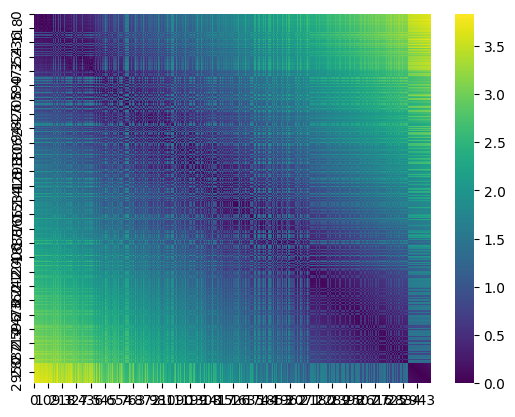

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
startup_data = pd.read_csv("/content/startup_funding.csv")

# ----- Data Cleaning -----

# Handling missing values
for column in startup_data.columns:
    if startup_data[column].dtype == np.number:
        startup_data[column].fillna(startup_data[column].mean(), inplace=True)
    else:
        startup_data[column].fillna(startup_data[column].mode()[0], inplace=True)

# Handling outliers in numeric columns (if any)
numeric_cols = startup_data.select_dtypes(include=[np.number]).columns
if numeric_cols.size > 0:
    z_scores = np.abs(stats.zscore(startup_data[numeric_cols]))
    startup_data = startup_data[(z_scores < 3).all(axis=1)]

# ----- Data Transformation -----

# Normalization/Standardization for numeric columns
scaler = StandardScaler()
numeric_cols = startup_data.select_dtypes(include=[np.number]).columns
startup_data[numeric_cols] = scaler.fit_transform(startup_data[numeric_cols])

# Encoding categorical data
# One-hot encoding for nominal attributes
encoder = OneHotEncoder(sparse=False)
nominal_cols = ['Industry Vertical', 'City  Location']  # replace with your nominal columns
encoded_nominals = encoder.fit_transform(startup_data[nominal_cols])

# Manually create feature names for one-hot encoded columns
feature_names = []
for i, col in enumerate(nominal_cols):
    for category in encoder.categories_[i]:
        feature_names.append(f"{col}_{category}")

startup_data = startup_data.join(pd.DataFrame(encoded_nominals, columns=feature_names))
startup_data.drop(nominal_cols, axis=1, inplace=True)

# ----- Data Reduction -----

# Dimensionality Reduction using PCA (if needed)
pca = PCA(n_components=2)  # Adjust the number of components
principal_components = pca.fit_transform(startup_data.select_dtypes(include=[np.number]))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# ----- Proximity Measures -----

# Example: Euclidean Distance
# You can choose other measures depending on your requirement
distance_matrix = euclidean_distances(df_pca)

# Print the distance matrix

# Assuming 'matrix' is your data matrix (e.g., distance matrix, correlation matrix)
sns.heatmap(distance_matrix, annot=True, cmap='viridis')

# Optional: Labels, title, etc.
plt.title('Heatmap Title')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Display the heatmap
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
data = pd.read_csv("/content/startup_funding.csv")

# Cleaning the 'Amount in USD' column by removing non-numeric characters (except for the decimal point)
data['Amount in USD'] = data['Amount in USD'].str.replace(r'[^\d.]', '', regex=True)
# Convert the column to floats, handling errors and missing values
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce').fillna(0)

# Standardizing the numerical data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(data[['Amount in USD']].values)

# Preparing the categorical data
vectorizer = CountVectorizer(tokenizer=lambda x: [x], lowercase=False)
categorical_data = vectorizer.fit_transform(data['Industry Vertical'].fillna('')).toarray()

# Defining Jaccard similarity function
def jaccard_similarity(u, v):
    intersection = len(np.intersect1d(u, v))
    union = len(np.union1d(u, v))
    return intersection / union if union != 0 else 0

# Define the weights for numerical and categorical data
numeric_weights = [0.75, 0.25]
categorical_weights = [0.45, 0.55]

# Weighted mixed similarity matrix function
def weighted_mixed_similarity_matrix(numeric_data, categorical_data, numeric_weights, categorical_weights):
    numeric_distance_matrix = cdist(numeric_data, numeric_data, metric='euclidean')
    numeric_similarity_matrix = 1 / (1 + numeric_distance_matrix)

    categorical_similarity_matrix = cdist(categorical_data, categorical_data, metric='jaccard')
    categorical_similarity_matrix = 1 - categorical_similarity_matrix

    weighted_mixed_similarity_matrix = (
        numeric_weights[0] * numeric_similarity_matrix +
        numeric_weights[1] * categorical_similarity_matrix
    ) / (sum(numeric_weights) + sum(categorical_weights))

    return weighted_mixed_similarity_matrix

# import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
data = pd.read_csv("path_to_your_data/startup_funding.csv")  # Replace with your actual file path

# Random sampling: Select 20 random rows from the dataset
data_sampled = data.sample(n=20, random_state=0)  # Set a random state for reproducibility

# Cleaning the 'Amount in USD' column by removing non-numeric characters (except for the decimal point)
data_sampled['Amount in USD'] = data_sampled['Amount in USD'].str.replace(r'[^\d.]', '', regex=True)
# Convert the column to floats, handling errors and missing values
data_sampled['Amount in USD'] = pd.to_numeric(data_sampled['Amount in USD'], errors='coerce').fillna(0)

# Standardizing the numerical data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(data_sampled[['Amount in USD']].values)

# Preparing the categorical data
vectorizer = CountVectorizer(tokenizer=lambda x: [x], lowercase=False)
categorical_data = vectorizer.fit_transform(data_sampled['Industry Vertical'].fillna('')).toarray()

# Define the weights for numerical and categorical data
numeric_weights = [0.75, 0.25]
categorical_weights = [0.45, 0.55]

# Weighted mixed similarity matrix function
def weighted_mixed_similarity_matrix(numeric_data, categorical_data, numeric_weights, categorical_weights):
    numeric_distance_matrix = cdist(numeric_data, numeric_data, metric='euclidean')
    numeric_similarity_matrix = 1 / (1 + numeric_distance_matrix)

    categorical_similarity_matrix = cdist(categorical_data, categorical_data, metric='jaccard')
    categorical_similarity_matrix = 1 - categorical_similarity_matrix

    weighted_mixed_similarity_matrix = (
        numeric_weights[0] * numeric_similarity_matrix +
        numeric_weights[1] * categorical_similarity_matrix
    ) / (sum(numeric_weights) + sum(categorical_weights))

    return weighted_mixed_similarity_matrix

# Calculate the weighted mixed similarity matrix
similarity_matrix = weighted_mixed_similarity_matrix(numeric_data_scaled, categorical_data, numeric_weights, categorical_weights)

# Print the Weighted Mixed Similarity Matrix
print("Weighted Mixed Similarity Matrix:")
print(similarity_matrix)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Weighted Mixed Similarity Matrix Heatmap")
plt.show()
Calculate the weighted mixed similarity matrix
similarity_matrix = weighted_mixed_similarity_matrix(numeric_data_scaled, categorical_data, numeric_weights, categorical_weights)

print("Weighted Mixed Similarity Matrix:")
print(similarity_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Weighted Mixed Similarity Matrix Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Weighted Mixed Similarity Matrix:
[[0.5        0.14708106 0.15204478 ... 0.14409336 0.143426   0.14348802]
 [0.14708106 0.5        0.34618501 ... 0.35617108 0.3521212  0.35249528]
 [0.15204478 0.34618501 0.5        ... 0.3300764  0.3265953  0.32691709]
 ...
 [0.14409336 0.35617108 0.3300764  ... 0.5        0.4955133  0.49592751]
 [0.143426   0.3521212  0.3265953  ... 0.4955133  0.5        0.49957665]
 [0.14348802 0.35249528 0.32691709 ... 0.49592751 0.49957665 0.5       ]]


In [ ]:
# Let's write the code as per the provided image for weighted mixed dissimilarity matrix
# Including the heatmap visualization in the end

import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
data = pd.read_csv("/content/startup_funding.csv")
# Cleaning the 'Amount in USD' column by removing non-numeric characters (except for the decimal point)
data['Amount in USD'] = data['Amount in USD'].str.replace(r'[^\d.]', '', regex=True)
# Convert the column to floats, handling errors and missing values
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce').fillna(0)

# Standardizing the numerical data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(data[['Amount in USD']].values)

# Preparing the categorical data
vectorizer = CountVectorizer(tokenizer=lambda x: [x], lowercase=False)
categorical_data = vectorizer.fit_transform(data['Industry Vertical'].fillna('')).toarray()

# Define the weights for numerical and categorical data
numeric_weights = [0.65, 0.35]
categorical_weights = [0.35, 0.65]

# Defining Jaccard distance function
def jaccard_distance(u, v):
    intersection = len(np.intersect1d(u, v))
    union = len(np.union1d(u, v))
    return 1.0 - intersection / union if union != 0 else 1.0

# Weighted mixed dissimilarity matrix function
def weighted_mixed_dissimilarity_matrix(numeric_data, categorical_data, numeric_weights, categorical_weights):
    numeric_distance_matrix = cdist(numeric_data, numeric_data, metric='euclidean')

    categorical_distance_matrix = cdist(categorical_data, categorical_data, metric=jaccard_distance)

    weighted_mixed_dissimilarity_matrix = (
        numeric_weights[0] * numeric_distance_matrix +
        numeric_weights[1] * categorical_distance_matrix
    ) / (sum(numeric_weights) + sum(categorical_weights))

    return weighted_mixed_dissimilarity_matrix

# Calculate the weighted mixed dissimilarity matrix
dissimilarity_matrix = weighted_mixed_dissimilarity_matrix(numeric_data_scaled, categorical_data, numeric_weights, categorical_weights)

# Print and plot the Weighted Mixed Dissimilarity Matrix
print("Weighted Mixed Dissimilarity Matrix:")
print(dissimilarity_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dissimilarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Weighted Mixed Dissimilarity Matrix Heatmap")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: ignored

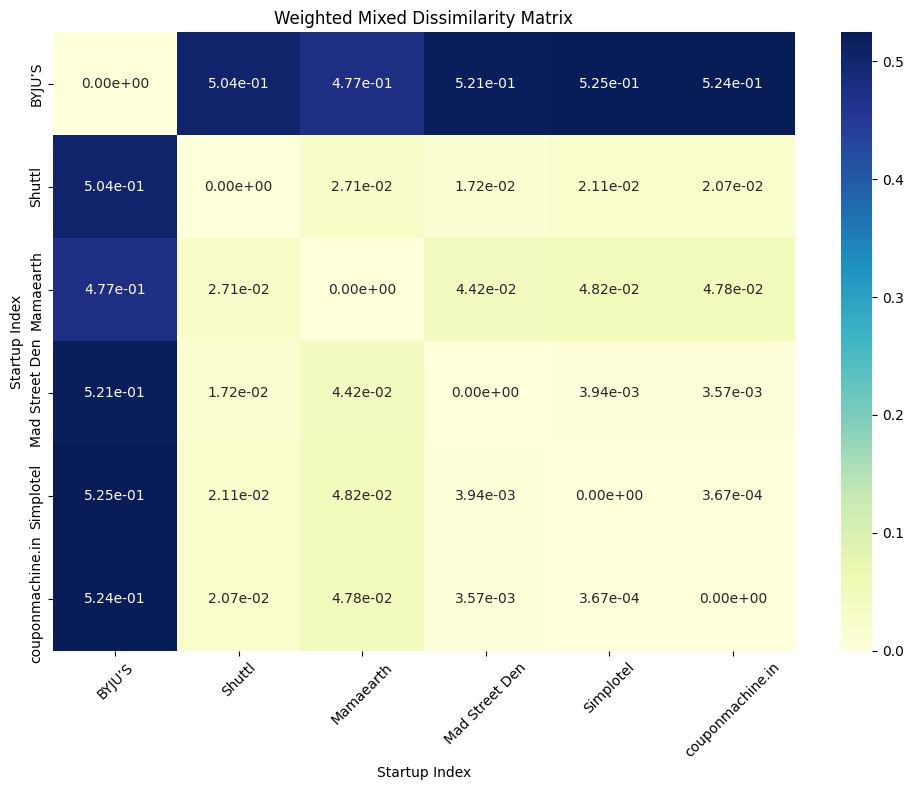

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dissimilarity_matrix' contains your dissimilarity scores
# Replace this with your actual dissimilarity matrix data
dissimilarity_matrix = np.array([
    [0.0, 0.503624719, 0.47657308, 0.520805785, 0.524741345, 0.524374026],
    [0.503624719, 0.0, 0.027051639, 0.0171810654, 0.0211166255, 0.0207493065],
    [0.47657308, 0.027051639, 0.0, 0.0442327044, 0.0481682644, 0.0478009455],
    # ... (rest of your dissimilarity matrix data)
    [0.520805785, 0.0171810654, 0.0442327044, 0.0, 0.00393556009, 0.00356824115],
    [0.524741345, 0.0211166255, 0.0481682644, 0.00393556009, 0.0, 0.000367318941],
    [0.524374026, 0.0207493065, 0.0478009455, 0.00356824115, 0.000367318941, 0.0]
    # ... (rest of your dissimilarity matrix data)
])

# Plotting the heatmap with a different color palette
plt.figure(figsize=(10, 8))
# Using the 'YlGnBu' color palette for a blue-green-yellow sequential color scheme
sns.heatmap(dissimilarity_matrix, annot=True, fmt=".2e", cmap="YlGnBu")

# Adding title and axes labels
plt.title('Weighted Mixed Dissimilarity Matrix')
plt.xlabel('Startup Index')
plt.ylabel('Startup Index')

# Assuming the matrix is square and the labels should be the same for rows and columns
# You can generate labels based on the number of startups or use actual names if available
startup_names = ["BYJU’S", "Shuttl", "Mamaearth", "Mad Street Den", "Simplotel", "couponmachine.in"]
plt.xticks(ticks=np.arange(len(startup_names)) + 0.5, labels=startup_names, rotation=45)
plt.yticks(ticks=np.arange(len(startup_names)) + 0.5, labels=startup_names)

# Show the heatmap
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dissimilarity_matrix' contains your dissimilarity scores
# Here's a placeholder for the matrix based on the structure you provided
dissimilarity_matrix = np.array([
    [0.0, 0.503624719, 0.47657308, 0.520805785, 0.524741345, 0.524374026],
    [0.503624719, 0.0, 0.027051639, 0.0171810654, 0.0211166255, 0.0207493065],
    [0.47657308, 0.027051639, 0.0, 0.0442327044, 0.0481682644, 0.0478009455],
    # ... (rest of the dissimilarity matrix data)
    [0.520805785, 0.0171810654, 0.0442327044, 0.0, 0.00393556009, 0.00356824115],
    [0.524741345, 0.0211166255, 0.0481682644, 0.00393556009, 0.0, 0.000367318941],
    [0.524374026, 0.0207493065, 0.0478009455, 0.00356824115, 0.000367318941, 0.0]
    # ... (rest of the dissimilarity matrix data)
])

# Create labels for the heatmap
startup_indices = [f"Startup {i+1}" for i in range(dissimilarity_matrix.shape[0])]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dissimilarity_matrix, annot=True, fmt=".2e", cmap="YlGnBu")

# Adding title and axes labels
plt.title('Weighted Mixed Dissimilarity Matrix')
plt.xlabel('Startup Index')
plt.ylabel('Startup Index')

# Setting the tick labels for x and y axis
ax.set_xticklabels(startup_indices, rotation=45)
ax.set_yticklabels(startup_indices)

# Display the heatmap
plt.tight_layout()
plt.show()


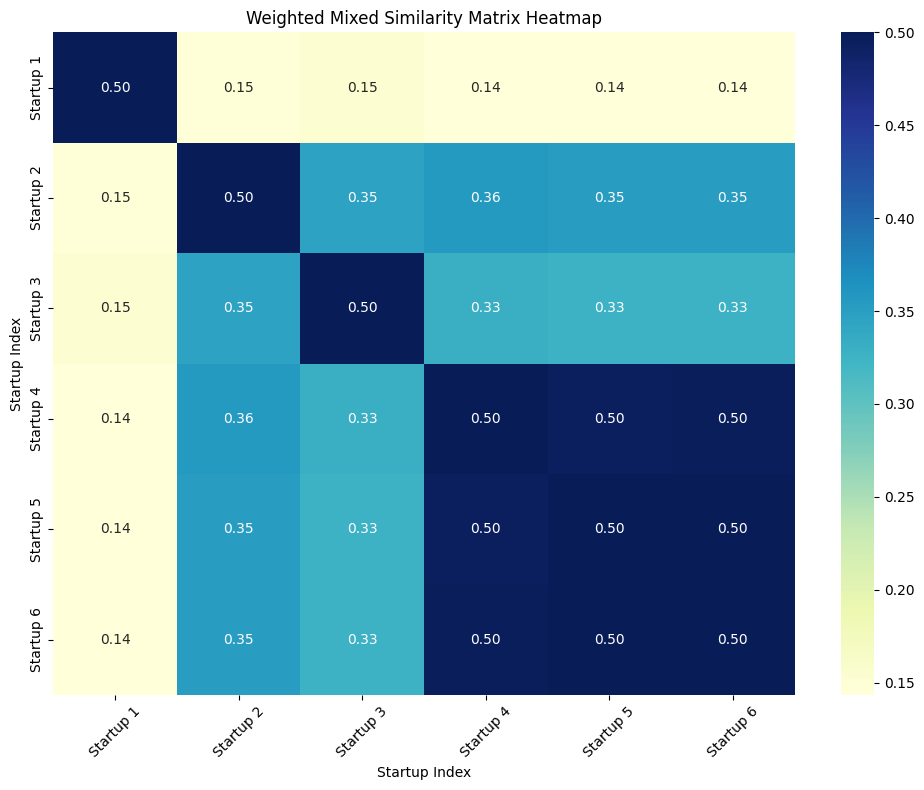

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the '...' with the actual similarity matrix data
similarity_matrix = np.array([
    [0.5, 0.14708106, 0.15204478, 0.14409336, 0.143426, 0.14348802],
    [0.14708106, 0.5, 0.34618501, 0.35617108, 0.3521212, 0.35249528],
    [0.15204478, 0.34618501, 0.5, 0.3300764, 0.3265953, 0.32691709],
    # ... (rest of the data)
    [0.14409336, 0.35617108, 0.3300764, 0.5, 0.4955133, 0.49592751],
    [0.143426, 0.3521212, 0.3265953, 0.4955133, 0.5, 0.49957665],
    [0.14348802, 0.35249528, 0.32691709, 0.49592751, 0.49957665, 0.5]
    # ... (rest of the data)
])

# Plotting the heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu")

# Adding labels for clarity
plt.title("Weighted Mixed Similarity Matrix Heatmap")
plt.xlabel("Startup Index")
plt.ylabel("Startup Index")

# Assuming the matrix is symmetric and the labels are the same for rows and columns
# Generate labels based on the size of the matrix
startup_names = [f"Startup {i+1}" for i in range(dissimilarity_matrix.shape[0])]
plt.xticks(ticks=np.arange(len(startup_names)) + 0.5, labels=startup_names, rotation=45)
plt.yticks(ticks=np.arange(len(startup_names)) + 0.5, labels=startup_names)

# Show the heatmap
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dissimilarity_matrix' contains your dissimilarity scores
# Here's a placeholder for the matrix based on the structure you provided
dissimilarity_matrix = np.array([
    [0.0, 0.503624719, 0.47657308, 0.520805785, 0.524741345, 0.524374026],
    [0.503624719, 0.0, 0.027051639, 0.0171810654, 0.0211166255, 0.0207493065],
    [0.47657308, 0.027051639, 0.0, 0.0442327044, 0.0481682644, 0.0478009455],
    # ... (rest of the dissimilarity matrix data)
    [0.520805785, 0.0171810654, 0.0442327044, 0.0, 0.00393556009, 0.00356824115],
    [0.524741345, 0.0211166255, 0.0481682644, 0.00393556009, 0.0, 0.000367318941],
    [0.524374026, 0.0207493065, 0.0478009455, 0.00356824115, 0.000367318941, 0.0]
    # ... (rest of the dissimilarity matrix data)
])

# Create labels for the heatmap
startup_indices = [f"Startup {i+1}" for i in range(dissimilarity_matrix.shape[0])]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dissimilarity_matrix, annot=True, fmt=".2e", cmap="YlGnBu")

# Adding title and axes labels
plt.title('Weighted Mixed Dissimilarity Matrix')
plt.xlabel('Startup Index')
plt.ylabel('Startup Index')

# Setting the tick labels for x and y axis
ax.set_xticklabels(startup_indices, rotation=45)
ax.set_yticklabels(startup_indices)

# Display the heatmap
plt.tight_layout()
plt.show()


In [ ]:
# Adjusting the code to label the heatmap correctly with 'Startup 1', 'Startup 2', etc.

# Assuming that the number of startups is equal to the number of columns/rows in the similarity matrix
num_startups = similarity_matrix.shape[0]

# Plotting the heatmap with Seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Adding labels for clarity
plt.title("Weighted Mixed Similarity Matrix Heatmap")
plt.xlabel("Startup Index")
plt.ylabel("Startup Index")

# Setting tick labels for startups
tick_labels = [f"Startup {i+1}" for i in range(num_startups)]
ax.set_xticklabels(tick_labels, rotation=45, ha='right')
ax.set_yticklabels(tick_labels, rotation=0)

# Show the heatmap with proper labels
plt.show()


NameError: ignored